Accuracy: 0.957374
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       582
           1       0.98      0.94      0.96       591

    accuracy                           0.96      1173
   macro avg       0.96      0.96      0.96      1173
weighted avg       0.96      0.96      0.96      1173

ROC AUC Score: 0.9950256132944918


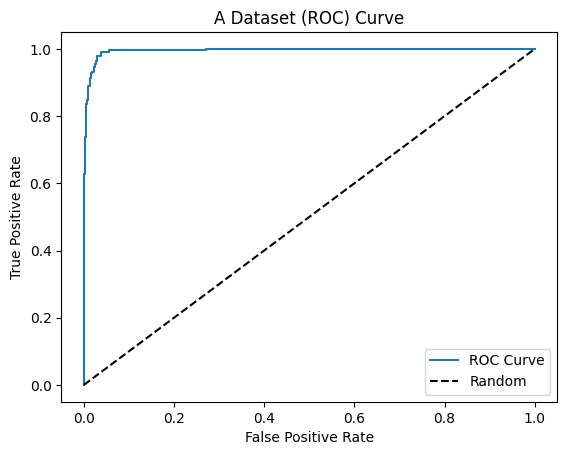

Confusion Matrix:
[[569  13]
 [ 37 554]]


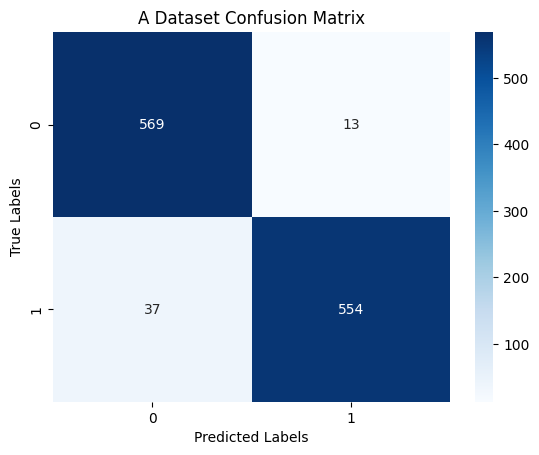

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataframe = pd.read_csv('/content/drive/MyDrive/bitirme/new_out2.csv')
popularity_threshold = dataframe['popularity'].median()
dataframe['popularity'] = dataframe['popularity'].apply(lambda x: 1 if x > 50 else 0)
X = dataframe.drop('popularity', axis=1)
y = dataframe['popularity']

# Apply Random Over-sampling to balance the data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBClassifier with the best parameters
classifier = XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=1.0)

# Fit the classifier to the training data
classifier.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred = classifier.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# Classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

# ROC AUC score
y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", auc_score)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('A Dataset (ROC) Curve')
plt.legend()
plt.show()
# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('A Dataset Confusion Matrix')
plt.show()


Accuracy: 0.979010
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     17132
           1       0.97      0.99      0.98     17360

    accuracy                           0.98     34492
   macro avg       0.98      0.98      0.98     34492
weighted avg       0.98      0.98      0.98     34492

ROC AUC Score: 0.9977672586455293


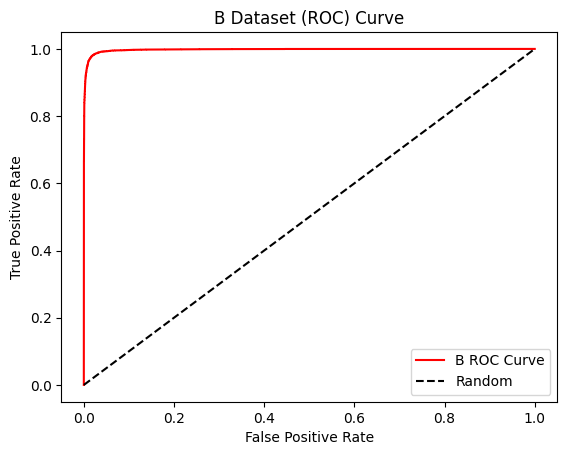

Confusion Matrix:
[[16620   512]
 [  212 17148]]


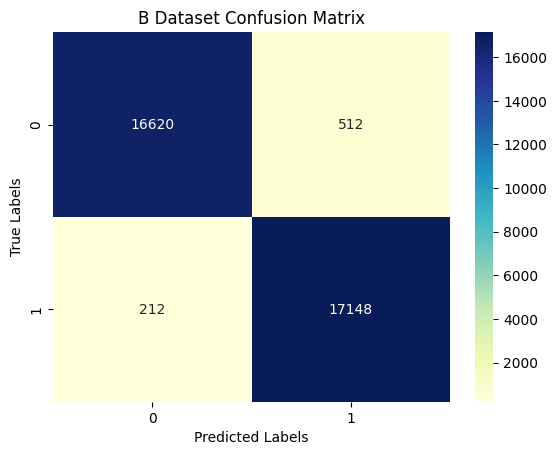

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataframe = pd.read_csv('/content/drive/MyDrive/bitirme/new_dataset2.csv')
popularity_threshold = dataframe['popularity'].median()
dataframe['popularity'] = dataframe['popularity'].apply(lambda x: 1 if x > 50 else 0)
X = dataframe.drop('popularity', axis=1)
y = dataframe['popularity']

# Apply Random Over-sampling to balance the data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBClassifier with the best parameters
classifier = XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=1.0)

# Fit the classifier to the training data
classifier.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred = classifier.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# Classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

# ROC AUC score
y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", auc_score)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Plot the ROC curve with changed color
plt.plot(fpr, tpr, label='B ROC Curve', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('B Dataset (ROC) Curve')
plt.legend()
plt.show()

# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Plot the confusion matrix as a heatmap with changed colors
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('B Dataset Confusion Matrix')
plt.show()


Accuracy: 0.971786
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    103255
           1       0.95      0.99      0.97    103560

    accuracy                           0.97    206815
   macro avg       0.97      0.97      0.97    206815
weighted avg       0.97      0.97      0.97    206815

ROC AUC Score: 0.9970858751856503
Confusion Matrix:
[[ 98406   4849]
 [   986 102574]]


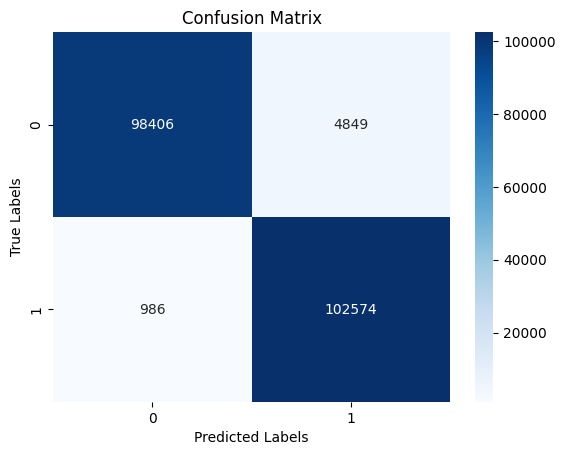

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataframe = pd.read_csv('/content/drive/MyDrive/bitirme/new_tracks2.csv')
popularity_threshold = dataframe['popularity'].median()
dataframe['popularity'] = dataframe['popularity'].apply(lambda x: 1 if x > 50 else 0)
X = dataframe.drop('popularity', axis=1)
y = dataframe['popularity']

# Apply Random Over-sampling to balance the data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBClassifier with the best parameters
classifier = XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=1.0)

# Fit the classifier to the training data
classifier.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred = classifier.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# Classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

# ROC AUC score
y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", auc_score)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Plot the ROC curve

# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
